# Code for Plots
Abigail Kopec
amk029@bucknell.edu

## Rn-222 Budget

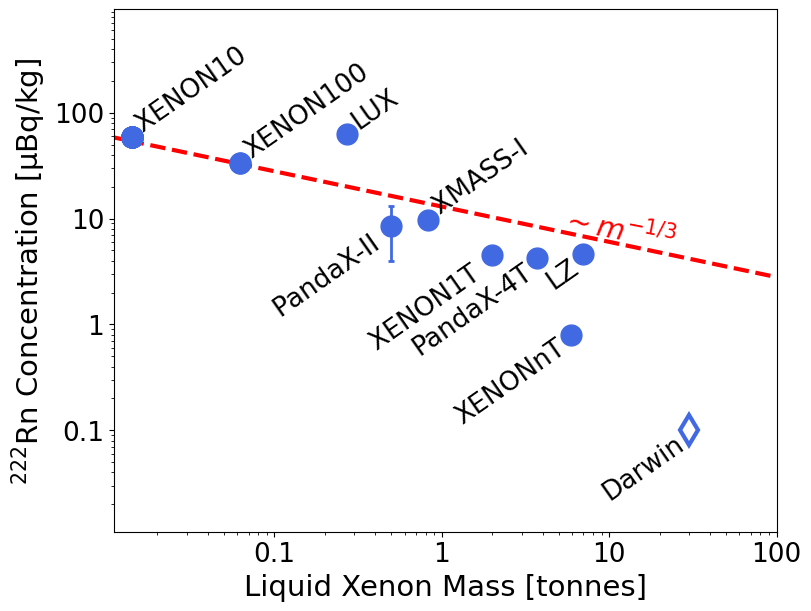

In [54]:
# Numbers and code provided by Masaki Yamashita from this github:
# https://github.com/masaki-yamashita/public/blob/main/Rn/experiments/plot_rn_bg_experiments.ipynb

# REFERENCES FOR NUMBERS
# XENON10 59+-2 uBq/kg Astroparticle Physics 34 (2011) 679–698
# EXO200 https://arxiv.org/pdf/1503.06241.pdf
# XENON100 33.4+-1.3 uBq/kg Eur. Phys. J. C (2017) 77:358
# PandaX-II 8.6+-4.6 uBq/kg PRL 117, 121303 (2016)
# LUX 214Pb 3.5-3Hz/270 kg -> 12.9+-1 uB/kg Physics Procedia 61 (2015) 658 – 665
# XMASS-I 8.2+-0.5 mBq/835 kg Nuclear Instruments and Methods in Physics Research A 716 (2013) 78–85
# XENON1T arXiv:2009.13981v3
# LZ Nucl. Instrum. Methods Phys. Res. A, 2020, 953, 163047
# darwin arXiv:1309.7024v2
# nEXO https://arxiv.org/pdf/2106.16243.pdf

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

exp_name = ['XENON10 ','XENON100', 
            'LUX', 'PandaX-II ', 'XMASS-I ', 'XENON1T ',
            'PandaX-4T','XENONnT', 'LZ', 'Darwin']
mass = np.array   ([14, 62, 270 , 500, 832, 2000,
                    3700, 5900, 7000, 30000])
rate_rn = np.array([59, 33.4, 63, 8.6, 9.8,
                    4.5, 4.2, 0.8, 4.6, 0.1])
rate_e  = np.array([2,  1.3, 1.0 , 4.6, 0.6,
                    0.1, 0, 0, 0, 0])

alignment = ["r", "r", "r", "l", "r", 
             "l", "l", "l", "l", "l"]

fontsize=21

plt.figure(figsize=(8,6), constrained_layout=True)

mask_past = np.less(mass, 9000)
mask_darwin = ~np.array(([0, 0, 0, 0, 0, 0,
                          0, 0, 0, 1]))

plt.errorbar(mass[mask_past], rate_rn[mask_past], yerr=rate_e[mask_past],
             color='royalblue',marker="o", ms=15, label="", elinewidth=2, capthick=2, capsize=2,
             linewidth=0)
plt.errorbar(mass[~mask_past*~mask_darwin], rate_rn[~mask_past*~mask_darwin], 
             yerr=rate_e[~mask_past*~mask_darwin],
             color='royalblue',marker="o", ms=15, label="", elinewidth=2, capthick=2, capsize=2,
             linewidth=0)
plt.errorbar(mass[-1], rate_rn[-1], yerr=rate_e[-1],
             color='royalblue',marker="d", ms=15, label="", elinewidth=2, capthick=2, capsize=2,
             linewidth=0, mfc='white', markeredgewidth=3)


x_mass = np.linspace(10,100000, 1000)
y_rn = (x_mass)**(-1/3.)*130


text_offset = 0
box_col = None

for idx in range(len(exp_name)):
    if alignment[idx] == "r":
        ha_align = "left"
        va_align = "bottom"
        txt_offset = text_offset
    else:
        ha_align = "right"
        va_align = "top"
        txt_offset = -text_offset

    plt.annotate(exp_name[idx], xy=[mass[idx], rate_rn[idx]], xytext=2*[txt_offset], 
                 size=fontsize-2, rotation=35, color="black", 
                 textcoords="offset points",
                 va=va_align,
                 ha=ha_align)


plt.annotate("$\sim m^{-1/3}$", xy=[5000,5], fontsize=fontsize, color = "red",rotation = -11)

plt.xlim(11,100000)
plt.ylim(0.011,950)
plt.xlabel("Liquid Xenon Mass [tonnes]", fontsize=fontsize)
plt.ylabel("$^{222}$Rn Concentration [µBq/kg]", fontsize=fontsize)
plt.semilogy()
plt.semilogx()

plt.plot(x_mass, y_rn,"red", linestyle="--", lw=3)

mass_ticks = ticker.FuncFormatter(lambda x, _: '{0:g}'.format(x*1e-3))
plt.gca().xaxis.set_major_formatter(mass_ticks)
conc_ticks = ticker.FuncFormatter(lambda x, _: '{0:g}'.format(x))
plt.gca().yaxis.set_major_formatter(conc_ticks)

plt.gca().xaxis.zorder=5
plt.gca().spines['bottom'].zorder=4

plt.gca().tick_params(labelsize=fontsize-2)

plt.show()

In [55]:
#XENON10 - 1001.2834
#XENON100 - 1609.06154, 1107.2155
#LUX - 1608.07648,2004.07791
#PandaX-II - 2007.15469
#XENON1T - 2112.12116,1805.12562
#PandaX-4T - 2107.13438
#XENONnT - 2207.11330,2303.14729
#LZ - 2207.03764


AC_exp = [0,1/48/365,
      2/33500, 0.014/328,
      0.5/1000/365,
      2.4/0.63/1000/365, 4/1.1/1000/365, 1.2/5500/60,
     ]

exp_name = ['XENON10 ','XENON100', #'EXO200', 
            'LUX', 'PandaX-II ', #'XMASS-I ', 
            'XENON1T ', #'', 
            'PandaX-4T','XENONnT', 'LZ', #'nEXO', 
            #'Darwin'
           ]
purity = np.array([2212, 519, #94.6 ,
                    750 , 1600, #832, 
                    660, #2000, 
                    1000, 10000, 7000, #3650, 
                    ])

max_drift = np.array([80, 160, #94.6 ,
                    325, 350, #832, 
                    750, #2000, 
                    817, 2200, 951, #3650, 
                    ])

extraction_field = np.array([12/1.85, 11/1.85, #94.6 ,
                    4.2, 4.56, #832, 
                    4.1, #2000, 
                    3.9, 2.9, 7.3/1.85, #3650, 
                    ])

drift_field = np.array([730, 500,#94.6 ,
                    180, 400, #832, 
                    82, #2000, 
                    93, 23, 193, #3650, 
                    ])

mass_n = np.array   ([14, 62, #94.6 ,
                    270 , 500, #832, 
                    2000, #2000, 
                    3700, 5900, 7000, #3650, 
                    ])



# Extraction Efficiency

In [56]:
# Determine the Extraction Efficiency from the Electric Field in liquid above gate.

def logistic(x,s,f):
    return 1 / (1 + np.exp((s-x)/f))
def inv_logistic(x,s,f):
    return s - f*(np.log((1/x) - 1))

s = 2.85
f = 0.69



In [57]:
ylevels = inv_logistic(np.asarray([0.999,0.90,0.80,0.70,0.60,0.50,0.40,0.30,0.20,0.10,0.01]),s,f)

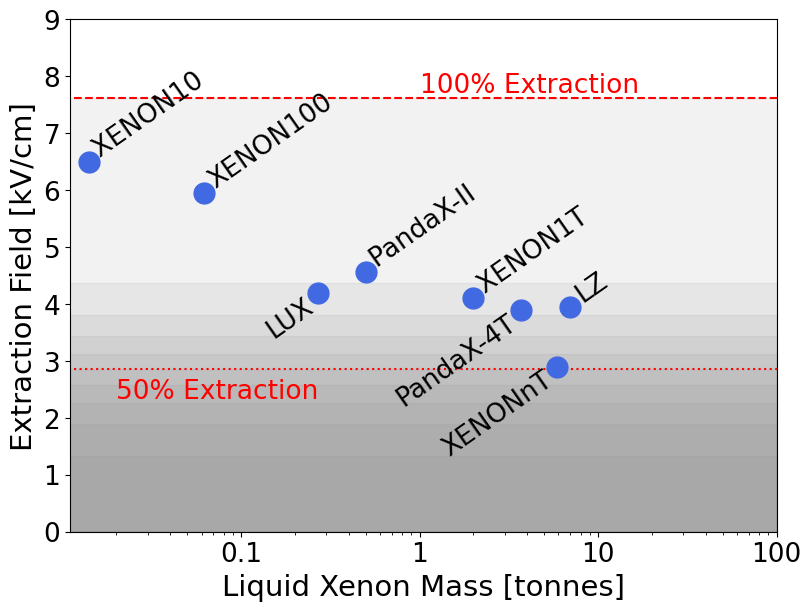

In [58]:
fig = plt.figure(figsize=(8,6), constrained_layout=True)

plt.plot([0.01,1e2],[ylevels[0]]*2,linestyle = '--',color = 'red')
plt.annotate('100% Extraction',[1,ylevels[0]+0.1], size = fontsize - 2,color = 'red')
plt.plot([0.01,1e2],[ylevels[5]]*2,linestyle = ':',color = 'red')
plt.annotate('50% Extraction',[0.02,ylevels[5]-0.5], size = fontsize - 2,color = 'red')

for i in range(len(ylevels)-1):
    plt.fill_between([0.01,1e2],[0,0],[ylevels[i]]*2,color = 'grey', alpha = 0.1)

    
alignment = ["r", "r", "l", "r", "r", 
             "l", "l", "r", "l"]

for idx in range(len(exp_name)):
    if alignment[idx] == "r":
        ha_align = "left"
        va_align = "bottom"
        txt_offset = text_offset
    else:
        ha_align = "right"
        va_align = "top"
        txt_offset = -text_offset

    plt.annotate(exp_name[idx], xy=[mass_n[idx]*1e-3,extraction_field[idx]], xytext=2*[txt_offset], 
                 size=fontsize-2, rotation=35, color="black", 
                 textcoords="offset points",  
                 va=va_align,
                 ha=ha_align)
    
plt.plot(mass_n*1e-3, extraction_field,
             color='royalblue',marker="o", ms=15, label="",
             linewidth=0)
plt.xlim(0.011,100)
plt.ylim(0,9)

plt.xlabel("Liquid Xenon Mass [tonnes]", fontsize=fontsize)
plt.ylabel("Extraction Field [kV/cm]", fontsize=fontsize)


# plt.semilogy()
plt.semilogx()
#plt.grid()


mass_ticks = ticker.FuncFormatter(lambda x, _: '{0:g}'.format(x))
plt.gca().xaxis.set_major_formatter(mass_ticks)


# plt.gca().xaxis.zorder=5
plt.gca().spines['bottom'].zorder=4
plt.gca().tick_params(labelsize=fontsize-2)


# plt.savefig("darwin_rn_background_scale.pdf")

plt.show()

## Drift Field

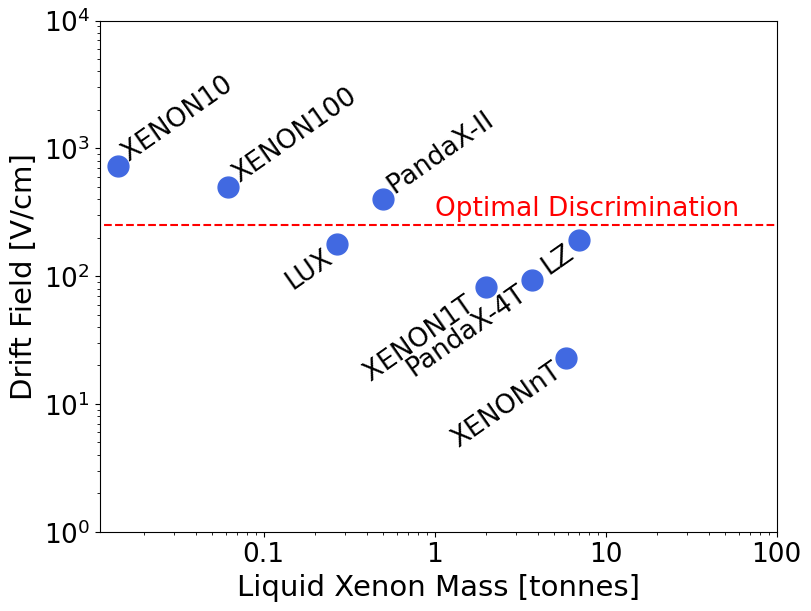

In [59]:
fig,ax1 = plt.subplots(figsize=(8,6), constrained_layout=True)
ax1.plot(mass_n, drift_field,# yerr=rate_e[mask_past],
             color='royalblue',marker="o", ms=15, label="", #elinewidth=2, capthick=2, capsize=2,
             linewidth=0)
ax1.plot([10,1e5],[250]*2,linestyle = '--',color = 'red')
ax1.annotate('Optimal Discrimination',[1e3,300], size = fontsize - 2,color = 'red')

alignment = ["r", "r", #"l", 
             "l", "r", "l",# "l", 
             "l", "l", "l",# "r"
            ]
for idx in range(len(exp_name)):
    if alignment[idx] == "r":
        ha_align = "left"
        va_align = "bottom"
        txt_offset = text_offset
    else:
        ha_align = "right"
        va_align = "top"
        txt_offset = -text_offset

    ax1.annotate(exp_name[idx], xy=[mass_n[idx],drift_field[idx]], xytext=2*[txt_offset], 
                 size=fontsize-2, rotation=35, color="black", 
                 textcoords="offset points", #backgroundcolor=box_col, 
                 va=va_align,
                 ha=ha_align)
    
# ax2 = ax1.twinx()
# ax2.set_ylabel('Extraction Efficiency', color = 'red', fontsize=fontsize)
ax1.set_ylabel('Drift Field [V/cm]', fontsize=fontsize)
ax1.set_ylim(1,10000)
ax1.tick_params(labelsize = fontsize-2)
# ax2.tick_params(labelsize = fontsize-2, labelcolor = 'red')
# ax2.set_yticks([0,2,4,6,8,10],[round(logistic(i,fit[0]-1,fit[1]),1) for i in [0,2,4,6,8,10]])

plt.xlim(11,100000)
plt.xlabel("Liquid Xenon Mass [tonnes]", fontsize=fontsize)

plt.semilogy()
plt.semilogx()
#plt.grid()


mass_ticks = ticker.FuncFormatter(lambda x, _: '{0:g}'.format(x*1e-3))
plt.gca().xaxis.set_major_formatter(mass_ticks)
# conc_ticks = ticker.FuncFormatter(lambda x, _: '{0:g}'.format(x))
# plt.gca().yaxis.set_major_formatter(conc_ticks)

plt.gca().xaxis.zorder=5
plt.gca().spines['bottom'].zorder=4

# plt.savefig("darwin_rn_background_scale.pdf")

plt.show()

# Purity

In [60]:
masscont = np.logspace(1,5,100)

drift_v = 1.7 #m/ms

def percentile(m,percent): #kg
    drift = (m/3000)**(1/3)
    drift_t = drift/drift_v
    return drift_t / (-np.log(percent))

ps = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.01]

/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_55760/343555512.py:8: RuntimeWarning: divide by zero encountered in divide
  return drift_t / (-np.log(percent))
/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_55760/1567562448.py:13: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate("90% Electron Survival", xy=[0.1,2.2],


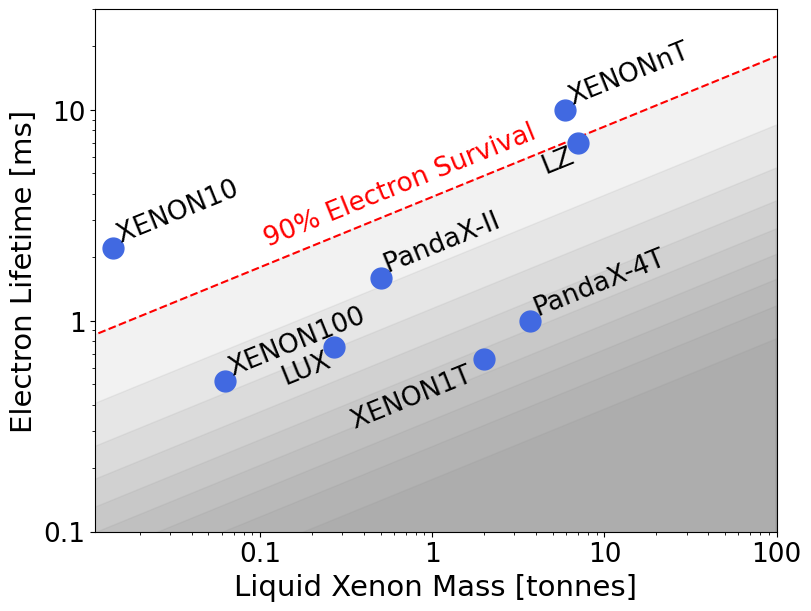

In [61]:
fig = plt.figure(figsize=(8,6), constrained_layout=True)


for i in range(len(ps)-1):
    plt.fill_between(masscont*1e-3,[0]*len(masscont),percentile(masscont,ps[i]),color = 'grey',alpha = 0.1)
    
plt.plot(masscont*1e-3,percentile(masscont,0.90),color = 'red',linestyle = '--')


alignment = ["r", "r", "l", "r", "l",
             "r", "r", "l", "r"]

plt.annotate("90% Electron Survival", xy=[0.1,2.2], 
                 size=fontsize-2, rotation=22, color="red", 
                 textcoords="offset points")

for idx in range(len(exp_name)):
    if alignment[idx] == "r":
        ha_align = "left"
        va_align = "bottom"
        txt_offset = text_offset
    else:
        ha_align = "right"
        va_align = "top"
        txt_offset = -text_offset

    plt.annotate(exp_name[idx], xy=[mass_n[idx]*1e-3,purity[idx]*1e-3], xytext=2*[txt_offset], 
                 size=fontsize-2, rotation=22, color="black", 
                 textcoords="offset points", #backgroundcolor=box_col, 
                 va=va_align,
                 ha=ha_align)
    
plt.plot(mass_n*1e-3, purity*1e-3,# yerr=rate_e[mask_past],
             color='royalblue',marker="o", ms=15, label="", #elinewidth=2, capthick=2, capsize=2,
             linewidth=0)
plt.xlim(0.011,100)
plt.ylim(0.1,30)

plt.xlabel("Liquid Xenon Mass [tonnes]", fontsize=fontsize)
plt.ylabel("Electron Lifetime [ms]", fontsize=fontsize)


plt.semilogy()
plt.semilogx()
#plt.grid()


mass_ticks = ticker.FuncFormatter(lambda x, _: '{0:g}'.format(x))
plt.gca().xaxis.set_major_formatter(mass_ticks)
plt.gca().yaxis.set_major_formatter(mass_ticks)


# plt.gca().xaxis.zorder=5
plt.gca().spines['bottom'].zorder=4
plt.gca().tick_params(labelsize=fontsize-2)


# plt.savefig("darwin_rn_background_scale.pdf")

plt.show()

## AC rates

In [62]:
def loneS1(m,n,flat):
    factor = 494/(6000**(2/3))
    pmts = int(m**(2/3)*factor)
    rates = []
    for i in range(len(n)):
        rate = 1
        for j in range(int(n[i])):
            rate = rate*40*(pmts - j) #40Hz photon+dark rate
            if j > 0:
                rate = rate*(1e-7) #100ns coincidence window
        rate = (rate + flat)
        rates.append(rate)
    return rates


In [63]:
S2_1T = 2.6e-3 #events/kg/day
S1 = np.linspace(1,100,100)


In [64]:
def ACrate(S1,S2_1T,m,drift_v,n,flat):
    AC = []
    for mi in m:
        S1rate = sum(loneS1(mi,S1[n:],flat))
        S2rate = S2_1T*((mi)/2000)**(3/3) #scale with mass from XENON1T ~2000 kg
        drift = (mi/3000)**(1/3) #scale with density 3000 kg/m^3
        drift_t = drift/drift_v
        Ac = S1rate*S2rate*0.000025*drift_t*60*60*24/mi #per kg day scale factor eta to 1T 0.000025
        AC.append(Ac)
    return np.asarray(AC)
    
    

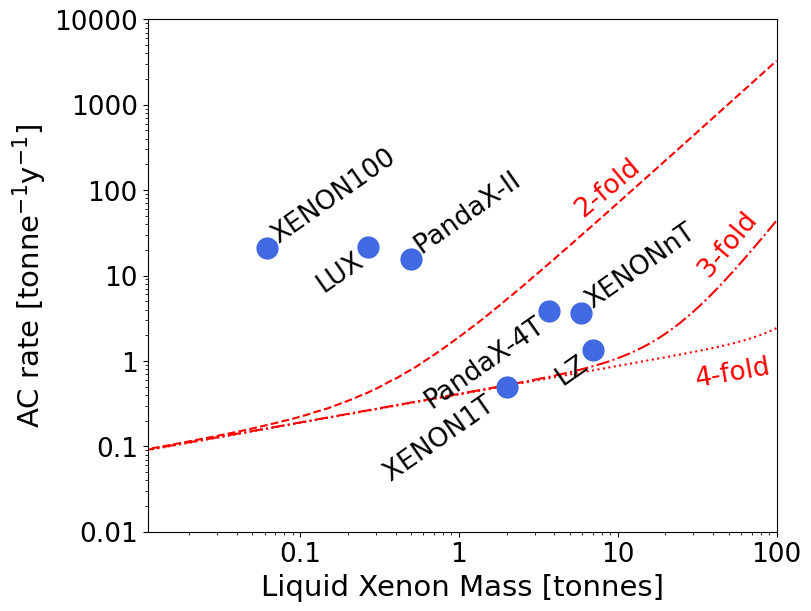

In [67]:
fig = plt.figure(figsize=(8,6), constrained_layout=True)

m = masscont

plt.plot(m*1e-3, ACrate(S1,S2_1T,m,1.7,1,1e-2)*365*1e3, color = 'red',linestyle='--')
plt.plot(m*1e-3, ACrate(S1,S2_1T,m,1.7,2,1e-2)*365*1e3, color = 'red',linestyle='-.')
plt.plot(m*1e-3, ACrate(S1,S2_1T,m,1.7,3,1e-2)*365*1e3, color = 'red',linestyle=':')

alignment = ["r", "r", "l", "r", "l",
             "l", "r", "l", "l"]

for idx in range(len(exp_name)):
    if alignment[idx] == "r":
        ha_align = "left"
        va_align = "bottom"
        txt_offset = text_offset
    else:
        ha_align = "right"
        va_align = "top"
        txt_offset = -text_offset

    plt.annotate(exp_name[idx], xy=[mass_n[idx]*1e-3,AC_exp[idx]*365*1e3], xytext=2*[txt_offset], 
                 size=fontsize-2, rotation=35, color="black", 
                 textcoords="offset points", #backgroundcolor=box_col, 
                 va=va_align,
                 ha=ha_align)

plt.annotate('2-fold',[5,50],color = 'red',size=fontsize-2, rotation=40)
plt.annotate('3-fold',[30,10],color = 'red',size=fontsize-2, rotation=50)
plt.annotate('4-fold',[30,0.5],color = 'red',size=fontsize-2, rotation=10)





plt.plot(mass_n*1e-3, np.asarray(AC_exp)*365*1e3,# yerr=rate_e[mask_past],
             color='royalblue',marker="o", ms=15, label="", #elinewidth=2, capthick=2, capsize=2,
             linewidth=0)

m = np.logspace(1,6,100)
plt.xlim(0.011,100)
plt.ylim(1e-2,10000)

plt.xlabel("Liquid Xenon Mass [tonnes]", fontsize=fontsize)
plt.ylabel("AC rate [tonne$^{-1}$y$^{-1}$]", fontsize=fontsize)


plt.semilogy()
plt.semilogx()
#plt.grid()


mass_ticks = ticker.FuncFormatter(lambda x, _: '{0:g}'.format(x))
plt.gca().xaxis.set_major_formatter(mass_ticks)
plt.gca().yaxis.set_major_formatter(mass_ticks)


# plt.gca().xaxis.zorder=5
plt.gca().spines['bottom'].zorder=4
plt.gca().tick_params(labelsize=fontsize-2)


# plt.savefig("darwin_rn_background_scale.pdf")

plt.show()